In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

In [61]:
# Import dataframe
df = pd.read_csv('./dataset/fake_real_news/news.csv')
df

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44273,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
44274,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
44275,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
44276,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [62]:
df.shape

(44278, 3)

# Text Processing

### Remove URLs

In [63]:
# Remove urls
df['text'] = df['text'].apply(lambda t: re.sub(r'http\S+', '', str(t)))
df['title'] = df['title'].apply(lambda t: re.sub(r'http\S+', '', str(t)))
(df['text'], df['title'])

(0        Donald Trump just couldn t wish all Americans ...
 1        House Intelligence Committee Chairman Devin Nu...
 2        On Friday, it was revealed that former Milwauk...
 3        On Christmas day, Donald Trump announced that ...
 4        Pope Francis used his annual Christmas Day mes...
                                ...                        
 44273    The State Department told the Republican Natio...
 44274    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
 44275     Anti-Trump Protesters Are Tools of the Oligar...
 44276    ADDIS ABABA, Ethiopia —President Obama convene...
 44277    Jeb Bush Is Suddenly Attacking Trump. Here's W...
 Name: text, Length: 44278, dtype: object,
 0         Donald Trump Sends Out Embarrassing New Year’...
 1         Drunk Bragging Trump Staffer Started Russian ...
 2         Sheriff David Clarke Becomes An Internet Joke...
 3         Trump Is So Obsessed He Even Has Obama’s Name...
 4         Pope Francis Just Called Out Donald Trump Dur.

I kept the "VIDEO" thing because I think that it could be helpful since the presence of some kind of external resource may be a sign of real facts.

### Tokenize

In [64]:
def tokenize(text):
    return word_tokenize(text)


df['text'] = df['text'].apply(tokenize)
df['title'] = df['title'].apply(tokenize)

(df['text'], df['title'])

(0        [Donald, Trump, just, couldn, t, wish, all, Am...
 1        [House, Intelligence, Committee, Chairman, Dev...
 2        [On, Friday, ,, it, was, revealed, that, forme...
 3        [On, Christmas, day, ,, Donald, Trump, announc...
 4        [Pope, Francis, used, his, annual, Christmas, ...
                                ...                        
 44273    [The, State, Department, told, the, Republican...
 44274    [The, ‘, P, ’, in, PBS, Should, Stand, for, ‘,...
 44275    [Anti-Trump, Protesters, Are, Tools, of, the, ...
 44276    [ADDIS, ABABA, ,, Ethiopia, —President, Obama,...
 44277    [Jeb, Bush, Is, Suddenly, Attacking, Trump, .,...
 Name: text, Length: 44278, dtype: object,
 0        [Donald, Trump, Sends, Out, Embarrassing, New,...
 1        [Drunk, Bragging, Trump, Staffer, Started, Rus...
 2        [Sheriff, David, Clarke, Becomes, An, Internet...
 3        [Trump, Is, So, Obsessed, He, Even, Has, Obama...
 4        [Pope, Francis, Just, Called, Out, Donald, Tru.

### Stopwords and Punctuation

In [65]:
stop_words = set(stopwords.words('english'))
punctuation = list(string.punctuation)
# Add punctuation and specific characters to the stopwords
stop_words.update(punctuation)
stop_words.update('‘')
stop_words.update('’')
# stop_words.update('“')
# stop_words.update('”')

def clean(text):
    return [w for w in text if w.strip().lower() not in stop_words]

df['text'] = df['text'].apply(clean)
df['title'] = df['title'].apply(clean)

(df['text'], df['title'])

(0        [Donald, Trump, wish, Americans, Happy, New, Y...
 1        [House, Intelligence, Committee, Chairman, Dev...
 2        [Friday, revealed, former, Milwaukee, Sheriff,...
 3        [Christmas, day, Donald, Trump, announced, wou...
 4        [Pope, Francis, used, annual, Christmas, Day, ...
                                ...                        
 44273    [State, Department, told, Republican, National...
 44274    [P, PBS, Stand, Plutocratic, Pentagon, Posted,...
 44275    [Anti-Trump, Protesters, Tools, Oligarchy, Re...
 44276    [ADDIS, ABABA, Ethiopia, —President, Obama, co...
 44277    [Jeb, Bush, Suddenly, Attacking, Trump, 's, Ma...
 Name: text, Length: 44278, dtype: object,
 0        [Donald, Trump, Sends, Embarrassing, New, Year...
 1        [Drunk, Bragging, Trump, Staffer, Started, Rus...
 2        [Sheriff, David, Clarke, Becomes, Internet, Jo...
 3        [Trump, Obsessed, Even, Obama, Name, Coded, We...
 4        [Pope, Francis, Called, Donald, Trump, Christm.

## Data Analysis and Visualization

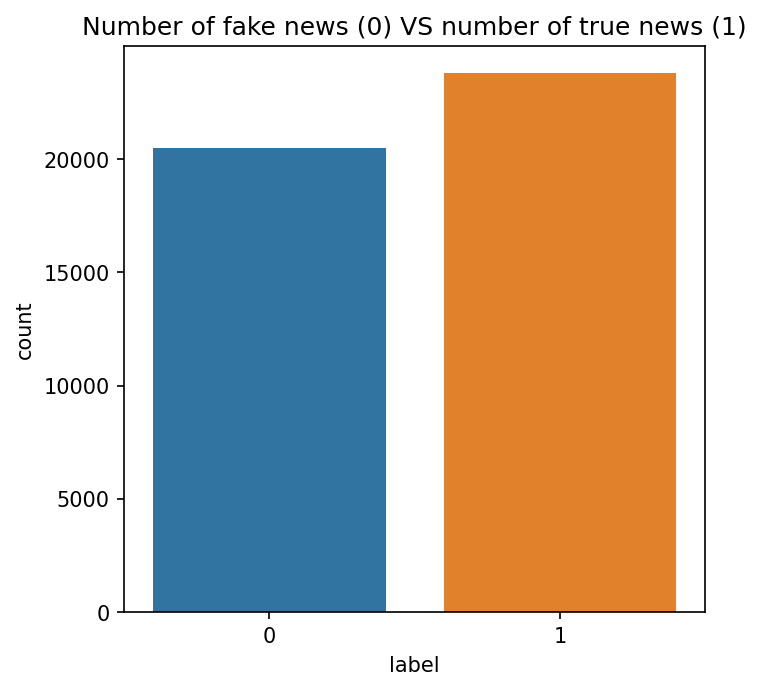

In [66]:
# Display the number of fake and the number of true news
plt.figure(figsize=(5, 5), dpi=150)

sns.countplot(df.label)

plt.title('Number of fake news (0) VS number of true news (1)')

plt.show()

We can see that the number of fake news is very close to the number of true news.

## Analysis of the texts

### Average text length

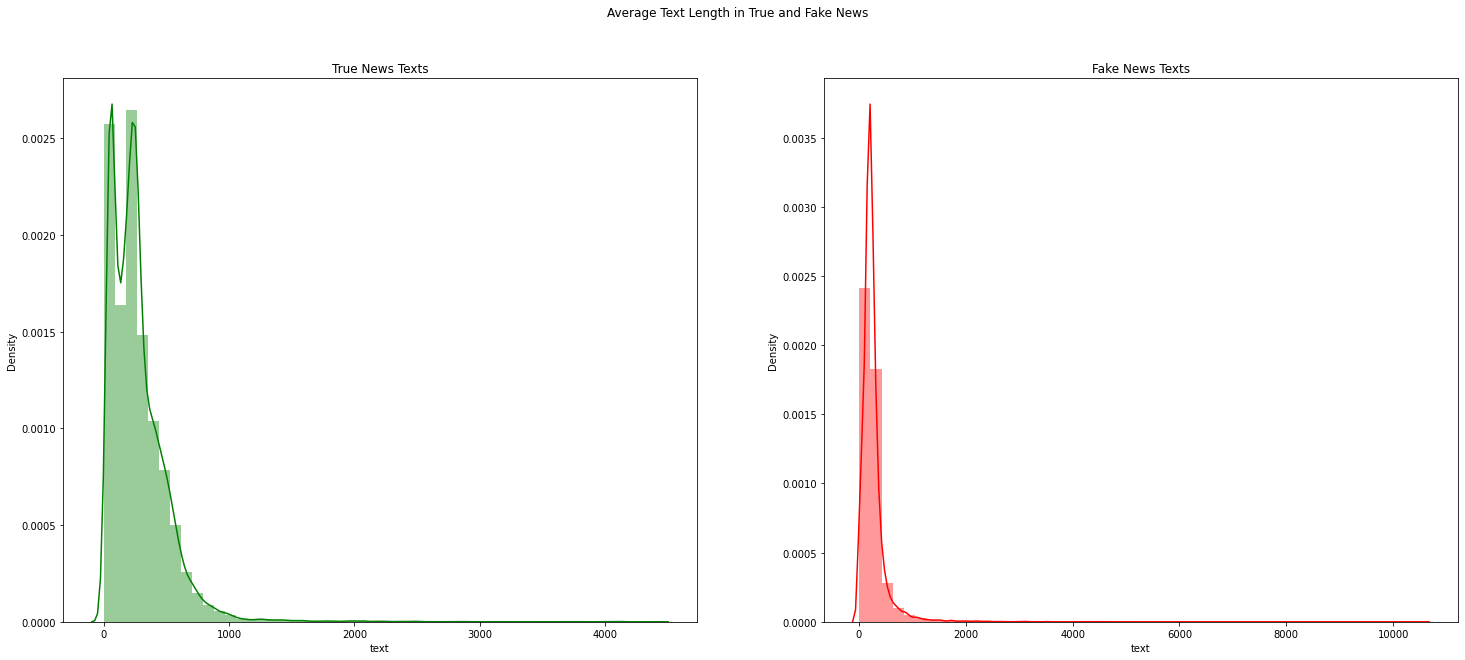

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

fake_text_length = df[df['label'] == 1]['text'].apply(lambda t: len(t))
sns.distplot(fake_text_length.map(lambda x: np.mean(x)), ax=ax1, color='green')
ax1.set_title('True News Texts')

true_text_length = df[df['label'] == 0]['text'].apply(lambda t: len(t))
sns.distplot(true_text_length.map(lambda x: np.mean(x)), ax=ax2, color='red')
ax2.set_title('Fake News Texts')

fig.suptitle('Average Text Length in True and Fake News')
plt.show()

### Average word length in texts

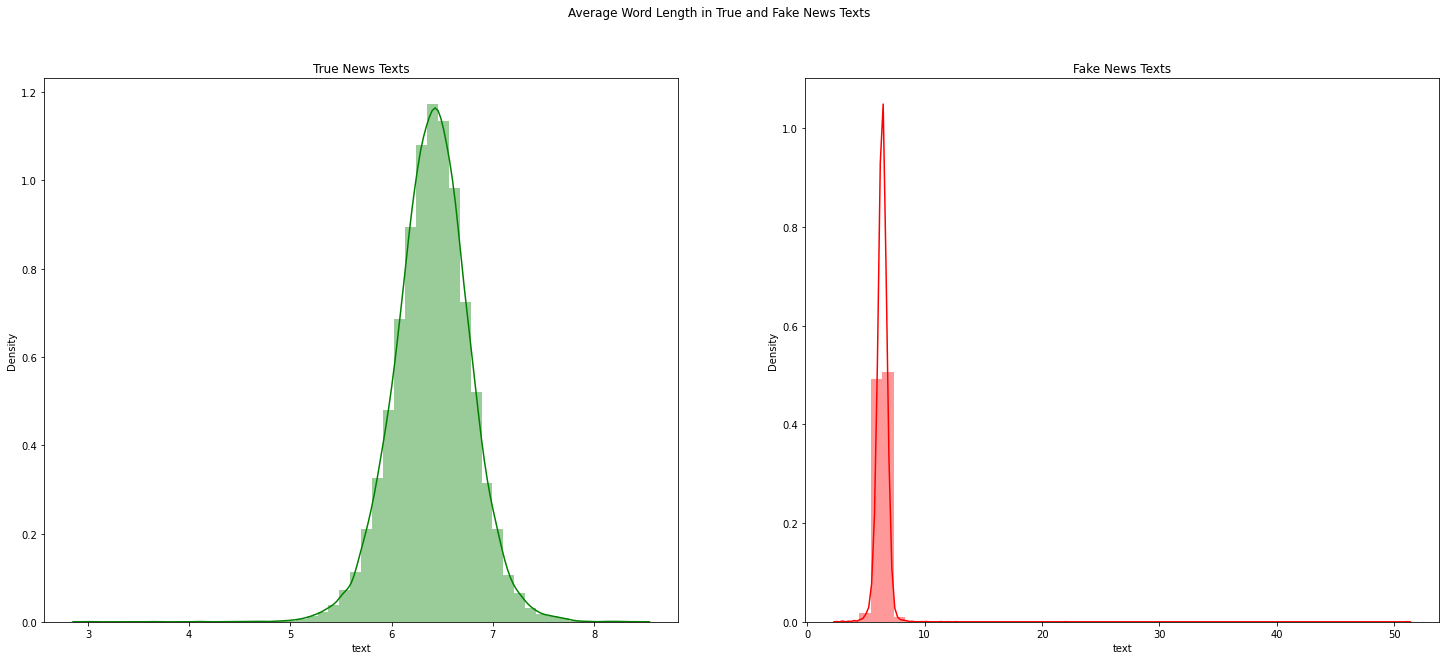

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

fake_avg_word_length = df[df['label'] == 1]['text'].apply(lambda t: [len(w) for w in t])
sns.distplot(fake_avg_word_length.map(lambda x: np.mean(x)), ax=ax1, color='green')
ax1.set_title('True News Texts')

true_avg_word_length = df[df['label'] == 0]['text'].apply(lambda t: [len(w) for w in t])
sns.distplot(true_avg_word_length.map(lambda x: np.mean(x)), ax=ax2, color='red')
ax2.set_title('Fake News Texts')

fig.suptitle('Average Word Length in True and Fake News Texts')
plt.show()

### Most common words

In [69]:
# Fake
corpus_fake = []

for text in df[df['label'] == 0]['text']:
    for word in text:
        corpus_fake.append(word)

# True
corpus_true = []

for text in df[df['label'] == 1]['text']:
    for word in text:
        corpus_true.append(word)

In [70]:
# Fake
most_common_fake_words = nltk.FreqDist(corpus_fake)
most_common_fake_words = {k: most_common_fake_words[k] for k in list(most_common_fake_words)[:10]}

# True
most_common_true_words = nltk.FreqDist(corpus_true)
most_common_true_words = {k: most_common_true_words[k] for k in list(most_common_true_words)[:10]}

{
    'most_common_words_in_fake_news': most_common_fake_words,
    'most_common_words_in_true_news': most_common_true_words
}

{'most_common_words_in_fake_news': {'Trump': 69587,
  'said': 26731,
  'people': 24615,
  'would': 22713,
  'one': 19713,
  'Clinton': 19026,
  'Donald': 16656,
  'like': 16436,
  '“': 15535,
  '”': 15167},
 'most_common_words_in_true_news': {'said': 113046,
  '“': 72324,
  '”': 71807,
  'Trump': 67153,
  'would': 38388,
  'U.S.': 37863,
  'also': 20109,
  'Clinton': 19756,
  'people': 19714,
  'Republican': 19514}}

I decided to keep the '“' and '”' characters because I think that it is interesting how many more quotes there are in real news.
We can see a difference of 56.789 more opening quotes in real news than in fake news

## Analysis of the titles

### Average title length

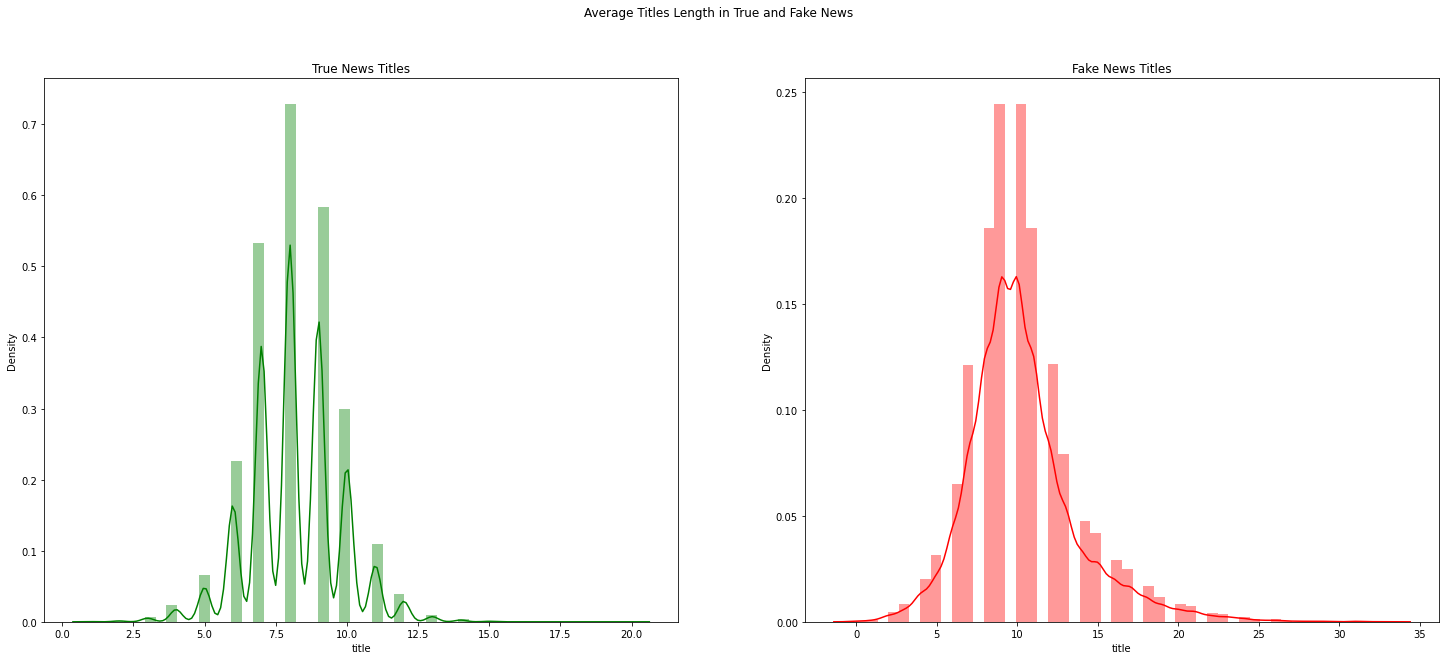

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

fake_text_length = df[df['label'] == 1]['title'].apply(lambda t: len(t))
sns.distplot(fake_text_length.map(lambda x: np.mean(x)), ax=ax1, color='green')
ax1.set_title('True News Titles')

true_text_length = df[df['label'] == 0]['title'].apply(lambda t: len(t))
sns.distplot(true_text_length.map(lambda x: np.mean(x)), ax=ax2, color='red')
ax2.set_title('Fake News Titles')

fig.suptitle('Average Titles Length in True and Fake News')
plt.show()

### Average word length in titles

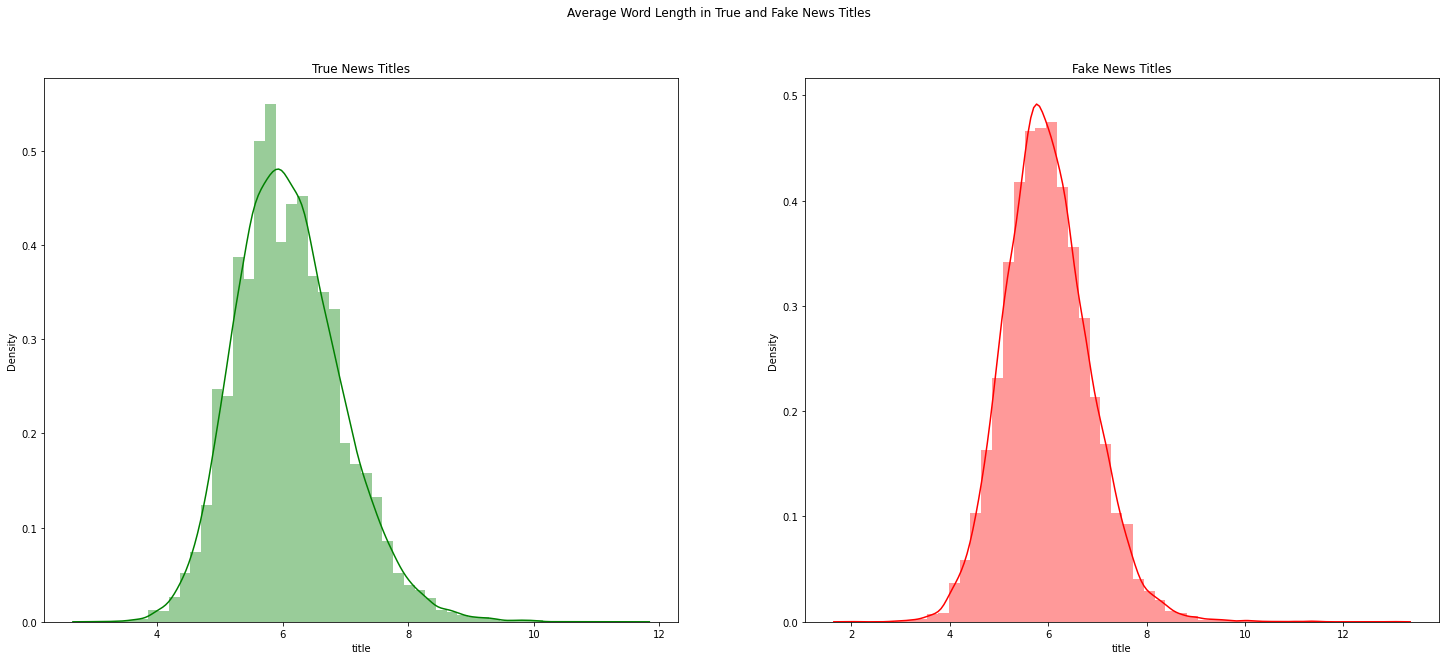

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

fake_avg_word_length = df[df['label'] == 1]['title'].apply(lambda t: [len(w) for w in t])
sns.distplot(fake_avg_word_length.map(lambda x: np.mean(x)), ax=ax1, color='green')
ax1.set_title('True News Titles')

true_avg_word_length = df[df['label'] == 0]['title'].apply(lambda t: [len(w) for w in t])
sns.distplot(true_avg_word_length.map(lambda x: np.mean(x)), ax=ax2, color='red')
ax2.set_title('Fake News Titles')

fig.suptitle('Average Word Length in True and Fake News Titles')
plt.show()

### Most common words in titles

In [73]:
# Fake
corpus_fake = []

for title in df[df['label'] == 0]['title']:
    for word in title:
        corpus_fake.append(word)

# True
corpus_true = []

for title in df[df['label'] == 1]['title']:
    for word in title:
        corpus_true.append(word)

In [74]:
# Fake
most_common_fake_words = nltk.FreqDist(corpus_fake)
most_common_fake_words = {k: most_common_fake_words[k] for k in list(most_common_fake_words)[:10]}

# True
most_common_true_words = nltk.FreqDist(corpus_true)
most_common_true_words = {k: most_common_true_words[k] for k in list(most_common_true_words)[:10]}

{
    'most_common_words_in_fake_news_titles': most_common_fake_words,
    'most_common_words_in_true_news_titles': most_common_true_words
}

{'most_common_words_in_fake_news_titles': {'Trump': 7000,
  'VIDEO': 4068,
  '”': 3294,
  '“': 3057,
  'Video': 1945,
  'Hillary': 1364,
  'WATCH': 1279,
  'Obama': 1240,
  'Clinton': 838,
  'Donald': 747},
 'most_common_words_in_true_news_titles': {'Trump': 5791,
  "'s": 4407,
  'U.S.': 3777,
  'says': 2977,
  'House': 1507,
  'Clinton': 1015,
  'Obama': 923,
  'Russia': 902,
  'White': 844,
  'North': 839}}

## Training the Model